In [1]:
## load training and test datasets using torchvision
## define a CNN
## loss func
## train
## test

In [2]:
import torch
import torch.nn as nn
import torchvision                          #torch中用来处理图像的库
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

#设置一些超参
num_epochs = 4        #训练的周期
batch_size = 4      #批训练的数量
learning_rate = 0.001 #学习率（0.1,0.01,0.001）

In [3]:
import os
os.environ['TORCH_HOME']='F:\jupyter_notebook_file\Mnist'
#导入训练数据
train_dataset = datasets.MNIST(root='F:/jupyter_notebook_file/Mnist/',                #数据集保存路径
                               train=True,                      #是否作为训练集
                               transform=transforms.ToTensor(), #数据如何处理, 可以自己自定义
                               download=True)                  #路径下没有的话, 可以下载           
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, #分批
                                           batch_size=batch_size,
                                           shuffle=True)          #随机分批
#导入测试数据
test_dataset = datasets.MNIST(root='F:/jupyter_notebook_file/Mnist/',
                              train=False,
                              transform=transforms.ToTensor(),
                              download=True,)   
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

classes = ('0','1', '2', '3', '4',
           '5', '6', '7', '8', '9')

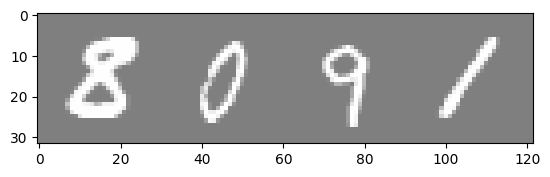

8     0     9     1    


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
# #MLP2
class MLP(nn.Module):                    #继承nn.module
    def __init__(self):
        super(MLP, self).__init__()      #继承的作用
        self.layer1 = nn.Linear(784,300) #hidden layer1-300
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(300,100)  #hidden layer2-100
        self.layer3 = nn.Linear(100,10)

    def forward(self,x):             #网络传播的结构
        x = x.reshape(-1, 28*28)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        y = self.layer3(x)
        return y
    
mlp = MLP() #类的实例化

In [6]:
##Define a Loss function and optimizer
loss_func = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate)

# criterion = nn.CrossEntropyLoss()  #交叉熵损失
optimizer = torch.optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)

In [7]:
##Train the network
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, (images, labels) in enumerate(train_loader): ## get the inputs; data is a list of [inputs, labels]
        optimizer.zero_grad()    # zero the parameter gradients 清零梯度
        # forward + backward + optimize
        outputs = mlp(images)
        loss = loss_func(outputs, labels)
        loss.backward()                                #反向求梯度
        optimizer.step()
        
#         # print statistics
#         if (i+1) % 100 == 0: # print every 100 mini-batches
#             print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, loss.item()))
        

        running_loss += loss.item()
        if i % 2000 == 1999:    
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.127
[1,  4000] loss: 0.421
[1,  6000] loss: 0.338
[1,  8000] loss: 0.285
[1, 10000] loss: 0.261
[1, 12000] loss: 0.217
[1, 14000] loss: 0.198
[2,  2000] loss: 0.155
[2,  4000] loss: 0.155
[2,  6000] loss: 0.155
[2,  8000] loss: 0.134
[2, 10000] loss: 0.126
[2, 12000] loss: 0.119
[2, 14000] loss: 0.117
[3,  2000] loss: 0.103
[3,  4000] loss: 0.099
[3,  6000] loss: 0.092
[3,  8000] loss: 0.083
[3, 10000] loss: 0.083
[3, 12000] loss: 0.082
[3, 14000] loss: 0.092
[4,  2000] loss: 0.069
[4,  4000] loss: 0.068
[4,  6000] loss: 0.059
[4,  8000] loss: 0.062
[4, 10000] loss: 0.064
[4, 12000] loss: 0.071
[4, 14000] loss: 0.071
Finished Training


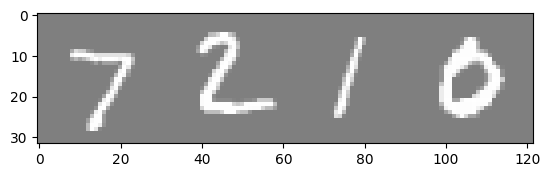

GroundTruth:  7     2     1     0    


In [8]:
#Test the network on the test data
#display an image from the test set to look
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
#The outputs are energies for the 10 classes. 
#The higher the energy for a class, the more the network thinks that the image is of the particular class. 
#So, let’s get the index of the highest energy:
#测试模型
#mlp.eval()      #测试模式，关闭正则化
correct = 0
total = 0
for images, labels in test_loader:
    outputs = mlp(images)
    _, predicted = torch.max(outputs, 1)   #返回值和索引
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('测试准确率: {:.4f}'.format(100.0*correct/total))

测试准确率: 97.5800


In [10]:
#Let us look at how the network performs on the whole dataset.
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = mlp(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 97 %


In [11]:
# what are the classes that performed well, and the classes that did not perform well:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = mlp(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 98.8 %
Accuracy for class: 1     is 99.4 %
Accuracy for class: 2     is 97.4 %
Accuracy for class: 3     is 98.4 %
Accuracy for class: 4     is 96.5 %
Accuracy for class: 5     is 96.3 %
Accuracy for class: 6     is 97.7 %
Accuracy for class: 7     is 96.8 %
Accuracy for class: 8     is 97.4 %
Accuracy for class: 9     is 96.7 %


In [12]:
#Use PyTorch Profiler to characterize 
#execution time and memory consumption
from torch.profiler import profile, record_function, ProfilerActivity

#Using profiler to analyze execution time
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    with record_function("model_inference"):
        mlp(images)
        
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

#Using profiler to analyze execution time
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    #with record_function("model_inference"): #删去之后和下面的图是一样的比例了
    mlp(images)
        
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

----------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
----------------------  ------------  ------------  ------------  ------------  ------------  ------------  
       model_inference        43.79%     261.000us       100.00%     596.000us     596.000us             1  
          aten::linear         3.36%      20.000us        46.31%     276.000us      92.000us             3  
           aten::addmm        29.03%     173.000us        34.90%     208.000us      69.333us             3  
               aten::t         4.87%      29.000us         8.05%      48.000us      16.000us             3  
            aten::relu         3.69%      22.000us         6.54%      39.000us      19.500us             2  
           aten::copy_         3.69%      22.000us         3.69%      22.000us       7.333us             3  
         aten::resh

In [13]:
# print(prof.key_averages(group_by_input_shape=True).table(sort_by="cpu_time_total", row_limit=10))

In [16]:
#Using profiler to analyze memory consumption

with profile(activities=[ProfilerActivity.CPU],profile_memory=True, record_shapes=True) as prof:
    with record_function("model_inference"): 
        mlp(images)
    
#print(prof.key_averages().table(sort_by="self_cpu_memory_usage", row_limit=10))
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))
print(prof.key_averages().table(sort_by="cpu_time_total"))

----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
----------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
       model_inference        48.44%     730.000us       100.00%       1.507ms       1.507ms           0 b     -12.66 Kb             1  
          aten::linear         2.19%      33.000us        42.40%     639.000us     213.000us       6.41 Kb           0 b             3  
           aten::addmm        28.67%     432.000us        33.31%     502.000us     167.333us       6.41 Kb       6.41 Kb             3  
            aten::relu         3.58%      54.000us         7.03%     106.000us      53.000us       6.25 Kb           0 b             2  
               aten::t         4.11%     